# 지하철 시간대별 데이터 시각화하기

* 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
* 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까?

대중교통 데이터를 바탕으로 질문에 답해보자.

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
#from google.colab import drive
#drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
#%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/13.데이터분석

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/내 노트북/Devpy_work/13.데이터분석


In [ ]:
#코랩의 경우
# 나눔고딕 폰트 인스톨
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

## 1. 지하철 시간대별 이용 현황 데이터 정제하기
---


아래처럼 데이터를 정제하세요

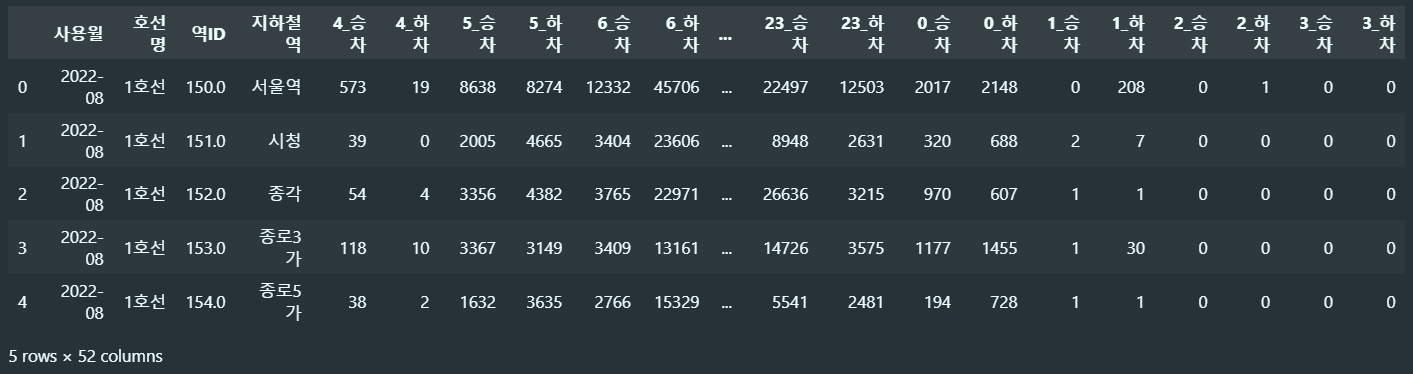

In [1]:
import pandas as pd

In [13]:
df = pd.read_csv('./data/subwaytime.CSV.CSV',encoding='euc_kr')
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-06,1호선,150.0,서울역,677,33,"8,470","9,569","13,528","54,052",...,"14,949","2,554","2,856",0,229,0,0,0,0,2023-07-03 08:56:54
2,2023-06,1호선,151.0,시청,61,1,"2,351","4,528","3,862","24,513",...,"4,535",334,"1,075",0,36,1,0,0,0,2023-07-03 08:56:54
3,2023-06,1호선,152.0,종각,95,4,"4,145","5,411","4,357","28,581",...,"4,703","1,202",870,0,0,0,0,0,0,2023-07-03 08:56:54
4,2023-06,1호선,153.0,종로3가,259,8,"4,585","3,292","3,959","13,393",...,"5,448","1,601","2,109",1,21,0,0,0,0,2023-07-03 08:56:54


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                614 non-null    object 
 1   호선명                614 non-null    object 
 2   역ID                614 non-null    float64
 3   지하철역               614 non-null    object 
 4   04:00:00~04:59:59  615 non-null    object 
 5   Unnamed: 5         615 non-null    object 
 6   05:00:00~05:59:59  615 non-null    object 
 7   Unnamed: 7         615 non-null    object 
 8   06:00:00~06:59:59  615 non-null    object 
 9   Unnamed: 9         615 non-null    object 
 10  07:00:00~07:59:59  615 non-null    object 
 11  Unnamed: 11        615 non-null    object 
 12  08:00:00~08:59:59  615 non-null    object 
 13  Unnamed: 13        615 non-null    object 
 14  09:00:00~09:59:59  615 non-null    object 
 15  Unnamed: 15        615 non-null    object 
 16  10:00:00~10:59:59  615 non

In [15]:
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51', '작업일시'],
      dtyp

In [16]:
df

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-06,1호선,150.0,서울역,677,33,"8,470","9,569","13,528","54,052",...,"14,949","2,554","2,856",0,229,0,0,0,0,2023-07-03 08:56:54
2,2023-06,1호선,151.0,시청,61,1,"2,351","4,528","3,862","24,513",...,"4,535",334,"1,075",0,36,1,0,0,0,2023-07-03 08:56:54
3,2023-06,1호선,152.0,종각,95,4,"4,145","5,411","4,357","28,581",...,"4,703","1,202",870,0,0,0,0,0,0,2023-07-03 08:56:54
4,2023-06,1호선,153.0,종로3가,259,8,"4,585","3,292","3,959","13,393",...,"5,448","1,601","2,109",1,21,0,0,0,0,2023-07-03 08:56:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2023-06,신림선,4407.0,당곡,0,0,"2,071",177,"4,012","1,101",...,"3,947",267,"1,314",3,3,0,0,0,0,2023-07-03 08:56:54
611,2023-06,신림선,4408.0,신림,0,0,929,188,"1,319",683,...,"2,183",291,801,0,1,0,0,0,0,2023-07-03 08:56:54
612,2023-06,신림선,4409.0,서원,0,0,"2,247",260,"4,510",669,...,"4,423",118,"1,431",1,1,0,0,0,0,2023-07-03 08:56:54
613,2023-06,신림선,4410.0,서울대벤처타운,2,0,"5,997",411,"9,712","2,945",...,"11,481",516,"5,596",1,135,0,0,0,0,2023-07-03 08:56:54


In [18]:
# 컬럼 새로 생성 - 맨 위 데이터프레임처럼 만들어야 하는데 전처리하는 과정이 너무 복잡함, 그래서 고정 컬럼만 리스트에 넣어주고 나머지는 반복이니까 04시 부터 23시까지 승차랑 하차 반복문에 넣어줌

new_col = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4, 24):
    new_col.append(f'{i}_승차')
    new_col.append(f'{i}_하차')

for i in range(0, 4):
    new_col.append(f'{i}_승차')
    new_col.append(f'{i}_하차')

new_col

['사용월',
 '호선명',
 '역ID',
 '지하철역',
 '4_승차',
 '4_하차',
 '5_승차',
 '5_하차',
 '6_승차',
 '6_하차',
 '7_승차',
 '7_하차',
 '8_승차',
 '8_하차',
 '9_승차',
 '9_하차',
 '10_승차',
 '10_하차',
 '11_승차',
 '11_하차',
 '12_승차',
 '12_하차',
 '13_승차',
 '13_하차',
 '14_승차',
 '14_하차',
 '15_승차',
 '15_하차',
 '16_승차',
 '16_하차',
 '17_승차',
 '17_하차',
 '18_승차',
 '18_하차',
 '19_승차',
 '19_하차',
 '20_승차',
 '20_하차',
 '21_승차',
 '21_하차',
 '22_승차',
 '22_하차',
 '23_승차',
 '23_하차',
 '0_승차',
 '0_하차',
 '1_승차',
 '1_하차',
 '2_승차',
 '2_하차',
 '3_승차',
 '3_하차']

In [19]:
len(new_col)

52

In [20]:
df.shape   # 작업일시 포함 -> 작업일시 제외하고 데이터프레임 만들기로 함

(615, 53)

In [22]:
df.head(3)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-06,1호선,150.0,서울역,677,33,"8,470","9,569","13,528","54,052",...,"14,949","2,554","2,856",0,229,0,0,0,0,2023-07-03 08:56:54
2,2023-06,1호선,151.0,시청,61,1,"2,351","4,528","3,862","24,513",...,"4,535",334,"1,075",0,36,1,0,0,0,2023-07-03 08:56:54


In [25]:
# 작업일시랑 결측치 부분은 필요없기 때문에 저렇게 슬라이싱 해서 추출
value = df.iloc[1:, :-1].values  # 작업일시 제외하고 데이터만 추출

In [29]:
# 새로운 데이터 프레임 만들기

new_df = pd.DataFrame(data = value, columns = new_col)
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2023-06,1호선,150.0,서울역,677,33,"8,470","9,569","13,528","54,052",...,"26,064","14,949","2,554","2,856",0,229,0,0,0,0
1,2023-06,1호선,151.0,시청,61,1,"2,351","4,528","3,862","24,513",...,"10,547","4,535",334,"1,075",0,36,1,0,0,0
2,2023-06,1호선,152.0,종각,95,4,"4,145","5,411","4,357","28,581",...,"28,697","4,703","1,202",870,0,0,0,0,0,0
3,2023-06,1호선,153.0,종로3가,259,8,"4,585","3,292","3,959","13,393",...,"19,488","5,448","1,601","2,109",1,21,0,0,0,0
4,2023-06,1호선,154.0,종로5가,74,1,"2,016","3,879","3,261","16,721",...,"6,735","3,739",286,980,0,0,0,0,0,0


In [30]:
new_df.to_csv('./data/subwaytime_pre.csv', index = False)

## 2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까
---
출근시간:아침 7,8,9시

In [33]:
new_df = pd.read_csv('./data/subwaytime_pre.csv', thousands=',')
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2023-06,1호선,150.0,서울역,677,33,8470,9569,13528,54052,...,26064,14949,2554,2856,0,229,0,0,0,0
1,2023-06,1호선,151.0,시청,61,1,2351,4528,3862,24513,...,10547,4535,334,1075,0,36,1,0,0,0
2,2023-06,1호선,152.0,종각,95,4,4145,5411,4357,28581,...,28697,4703,1202,870,0,0,0,0,0,0
3,2023-06,1호선,153.0,종로3가,259,8,4585,3292,3959,13393,...,19488,5448,1601,2109,1,21,0,0,0,0
4,2023-06,1호선,154.0,종로5가,74,1,2016,3879,3261,16721,...,6735,3739,286,980,0,0,0,0,0,0


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     614 non-null    object 
 1   호선명     614 non-null    object 
 2   역ID     614 non-null    float64
 3   지하철역    614 non-null    object 
 4   4_승차    614 non-null    int64  
 5   4_하차    614 non-null    int64  
 6   5_승차    614 non-null    int64  
 7   5_하차    614 non-null    int64  
 8   6_승차    614 non-null    int64  
 9   6_하차    614 non-null    int64  
 10  7_승차    614 non-null    int64  
 11  7_하차    614 non-null    int64  
 12  8_승차    614 non-null    int64  
 13  8_하차    614 non-null    int64  
 14  9_승차    614 non-null    int64  
 15  9_하차    614 non-null    int64  
 16  10_승차   614 non-null    int64  
 17  10_하차   614 non-null    int64  
 18  11_승차   614 non-null    int64  
 19  11_하차   614 non-null    int64  
 20  12_승차   614 non-null    int64  
 21  12_하차   614 non-null    int64  
 22  13


## 1. 출근시간 대 가장 많이 승차하는 역은?

```
아래와 같은 형식으로 출력
출근 시간대 사람들이 가장 많이 타는 역은?  홍대 : 32347
```

In [36]:
new_df['출근시간대_승차합계'] = new_df['7_승차'] + new_df['8_승차'] + new_df['9_승차']
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
0,2023-06,1호선,150.0,서울역,677,33,8470,9569,13528,54052,...,14949,2554,2856,0,229,0,0,0,0,178483
1,2023-06,1호선,151.0,시청,61,1,2351,4528,3862,24513,...,4535,334,1075,0,36,1,0,0,0,30998
2,2023-06,1호선,152.0,종각,95,4,4145,5411,4357,28581,...,4703,1202,870,0,0,0,0,0,0,30813
3,2023-06,1호선,153.0,종로3가,259,8,4585,3292,3959,13393,...,5448,1601,2109,1,21,0,0,0,0,29513
4,2023-06,1호선,154.0,종로5가,74,1,2016,3879,3261,16721,...,3739,286,980,0,0,0,0,0,0,31936


In [38]:
new_df['출근시간대_승차합계']
top_df = new_df.sort_values(by = ['출근시간대_승차합계'], ascending=False)

In [40]:
top_df.iloc[0,3], top_df.iloc[0, -1] 

('신림', 634022)

In [42]:
len(top_df)

614

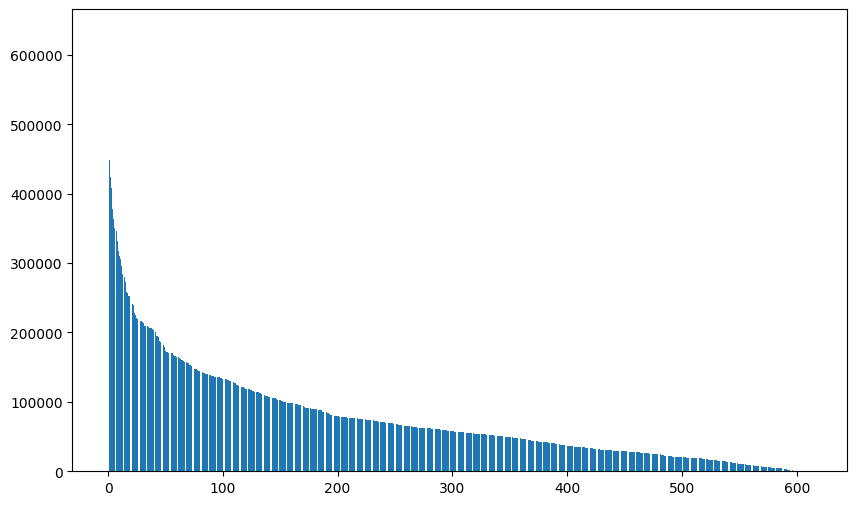

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(range(len(top_df)), top_df['출근시간대_승차합계'])
plt.show()

신림이 가장 높은 수치를 보여주는데 프레임 상에서는 6만대였으나 그래프에서는 4만대 중반으로 나옴

In [45]:
top_df.describe()

,역ID,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,7_승차,7_하차,8_승차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.0,614.000000
mean,1924.058632,247.244300,3.537459,5452.833876,1404.438111,11160.669381,7363.167752,26873.296417,16750.688925,30126.223127,...,8172.050489,620.262215,2462.861564,0.431596,73.289902,0.017915,0.022801,0.0,0.0,76099.421824
std,1206.574376,810.073333,8.523706,5915.422998,1502.996457,10531.673503,7631.735579,26043.840045,21744.508655,30031.648856,...,8320.506391,1236.708157,2711.640047,1.372431,265.837040,0.155397,0.159939,0.0,0.0,73258.382461
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,1203.250000,6.000000,0.000000,1602.250000,463.500000,3664.750000,2541.000000,8435.750000,5110.000000,10455.000000,...,2813.750000,60.500000,763.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,27390.250000
50%,1822.500000,31.000000,1.000000,3677.000000,969.000000,8262.500000,4888.500000,19507.500000,9394.000000,22068.000000,...,6133.000000,214.500000,1758.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,56502.000000
75%,2634.750000,146.750000,3.000000,6935.000000,1794.000000,15151.750000,9460.500000,36395.500000,19169.250000,40766.250000,...,10546.750000,659.750000,3370.000000,0.000000,9.750000,0.000000,0.000000,0.0,0.0,99731.750000
max,4713.000000,13085.000000,110.000000,41222.000000,11414.000000,73232.000000,54052.000000,191986.000000,154867.000000,275438.000000,...,78228.000000,14863.000000,24011.000000,15.000000,3205.000000,2.000000,2.000000,0.0,0.0,634022.000000


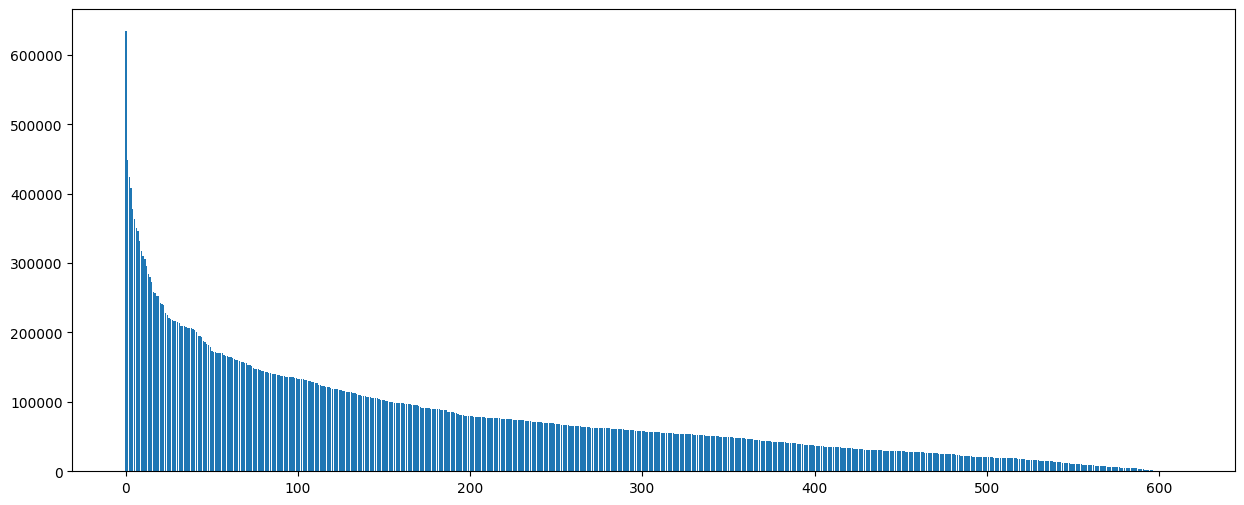

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(range(len(top_df)), top_df['출근시간대_승차합계'])
plt.show()

화면 비율에 따라 데이터가 표시가 되고 혹은 되지 않는 상황이 발생한다.
이것은 데이터 시각화에서 주의해야핼 부분으로
통계 데이터와 함께 검증을 통해서 보완 방향을 결정해야 한다.

## 2. 출근 시간대에 사람들이 가장 많이 내리는 역은?

In [47]:
new_df['출근시간대 하차합계'] = new_df['7_하차'] + new_df['8_하차'] + new_df['9_하차']
new_df.head(3)

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계,출근시간대 하차합계
0,2023-06,1호선,150.0,서울역,677,33,8470,9569,13528,54052,...,2554,2856,0,229,0,0,0,0,178483,502164
1,2023-06,1호선,151.0,시청,61,1,2351,4528,3862,24513,...,334,1075,0,36,1,0,0,0,30998,366430
2,2023-06,1호선,152.0,종각,95,4,4145,5411,4357,28581,...,1202,870,0,0,0,0,0,0,30813,531965


In [50]:
bottom_df = new_df.sort_values(by = ['출근시간대 하차합계'], ascending=False)
bottom_df

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계,출근시간대 하차합계
30,2023-06,2호선,221.0,역삼,23,0,3725,6818,9031,43086,...,3673,3380,0,20,0,0,0,0,66523,817239
31,2023-06,2호선,222.0,강남,156,9,8947,11414,18370,53723,...,14863,7004,1,40,0,0,0,0,157201,760644
28,2023-06,2호선,219.0,삼성(무역센터),176,1,4532,5213,6793,42711,...,3029,4356,0,1160,0,0,0,0,55333,741180
512,2023-06,7호선,2748.0,가산디지털단지,725,2,7791,6130,9696,31228,...,1598,3041,1,1,0,0,0,0,69718,721107
11,2023-06,2호선,202.0,을지로입구,51,0,2603,3144,4216,28666,...,3786,5026,5,873,0,0,0,0,54587,640051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,2023-06,경원선,1022.0,창동,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
237,2023-06,분당선,1031.0,복정,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,8,0
72,2023-06,3호선,321.0,충무로,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,3,0
440,2023-06,6호선,2615.0,연신내,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


In [52]:
bottom_df.iloc[0,3], bottom_df.iloc[0,-1]

('역삼', 817239)

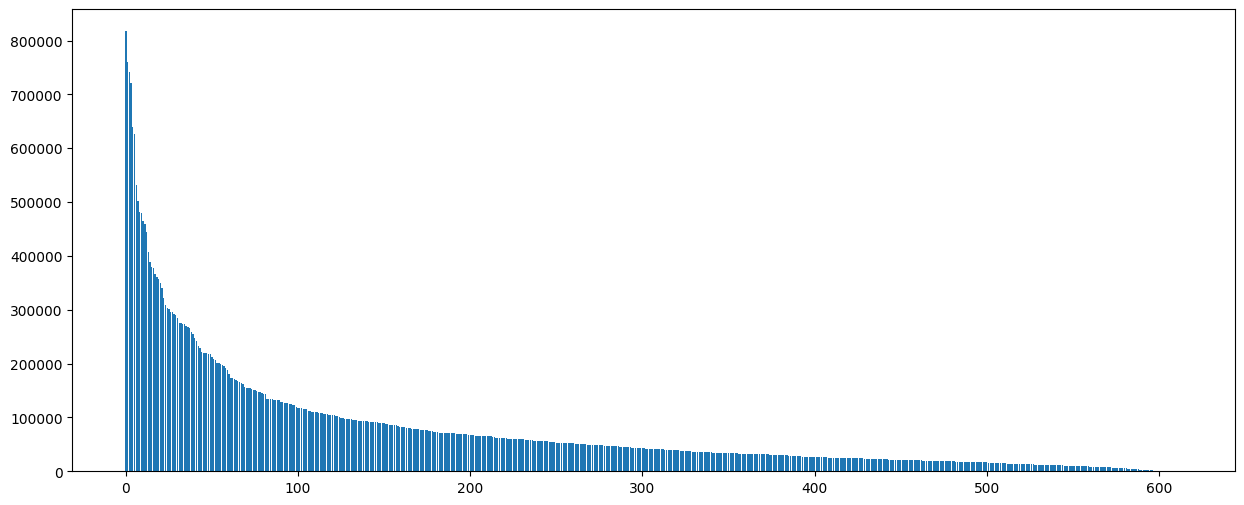

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar(range(len(bottom_df)), bottom_df['출근시간대 하차합계'])
plt.show()

## 3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까

In [5]:
import pandas as pd
new_df = pd.read_csv('./data/subwaytime_pre.csv', thousands=',')
new_df.head()
df_23 = new_df.sort_values(by = ['23_승차'], ascending=False)
df_23

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
48,2023-06,2호선,239.0,홍대입구,1096,19,30919,3733,32348,18545,...,98489,54853,13413,18986,3,2178,0,0,0,0
31,2023-06,2호선,222.0,강남,156,9,8947,11414,18370,53723,...,80699,26257,14863,7004,1,40,0,0,0,0
21,2023-06,2호선,212.0,건대입구,394,13,17541,1814,22600,15731,...,47176,33762,8390,11782,7,888,0,0,0,0
49,2023-06,2호선,240.0,신촌,80,5,8276,2947,15242,16031,...,43441,25121,6836,7408,3,195,0,0,0,0
35,2023-06,2호선,226.0,사당,62,4,12748,4655,28962,36271,...,36194,42028,6255,12183,10,848,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2023-06,6호선,2615.0,연신내,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,2023-06,경원선,1022.0,창동,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,2023-06,중앙선,1220.0,지평,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
237,2023-06,분당선,1031.0,복정,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까
---


In [18]:
import pandas as pd

new_df = pd.read_csv('./data/subwaytime_pre.csv', thousands=',')

In [21]:
on = []
off = []

for i in range(0, 24):
    df_on = new_df.sort_values(by = [f'{i}_승차'], ascending=False)
    df_off = new_df.sort_values(by = [f'{i}_하차'], ascending=False)

    on.append([df_on['지하철역'].values[0], df_on[f'{i}_승차'].values[0]])
    off.append([df_off['지하철역'].values[0], df_off[f'{i}_승차'].values[0]])
    
    print(f'{i}시 최다 승차역: {on[-1][0]} / 최다 하차역: {off[-1][0]}')

0시 최다 승차역: 강남 / 최다 하차역: 신림
1시 최다 승차역: 개화 / 최다 하차역: 서울대입구(관악구청)
2시 최다 승차역: 아현 / 최다 하차역: 개화
3시 최다 승차역: 서울역 / 최다 하차역: 서울역
4시 최다 승차역: 구로 / 최다 하차역: 영등포
5시 최다 승차역: 부천 / 최다 하차역: 강남
6시 최다 승차역: 신림 / 최다 하차역: 서울역
7시 최다 승차역: 신림 / 최다 하차역: 강남
8시 최다 승차역: 신림 / 최다 하차역: 가산디지털단지
9시 최다 승차역: 신림 / 최다 하차역: 역삼
10시 최다 승차역: 신림 / 최다 하차역: 강남
11시 최다 승차역: 잠실(송파구청) / 최다 하차역: 홍대입구
12시 최다 승차역: 잠실(송파구청) / 최다 하차역: 홍대입구
13시 최다 승차역: 강남 / 최다 하차역: 홍대입구
14시 최다 승차역: 강남 / 최다 하차역: 홍대입구
15시 최다 승차역: 강남 / 최다 하차역: 홍대입구
16시 최다 승차역: 강남 / 최다 하차역: 홍대입구
17시 최다 승차역: 강남 / 최다 하차역: 홍대입구
18시 최다 승차역: 삼성(무역센터) / 최다 하차역: 잠실(송파구청)
19시 최다 승차역: 강남 / 최다 하차역: 신림
20시 최다 승차역: 강남 / 최다 하차역: 신림
21시 최다 승차역: 홍대입구 / 최다 하차역: 신림
22시 최다 승차역: 홍대입구 / 최다 하차역: 신림
23시 최다 승차역: 홍대입구 / 최다 하차역: 신림


시간대별로 사람들이 가장 많이 승차하는 그래프를 그려보자.

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

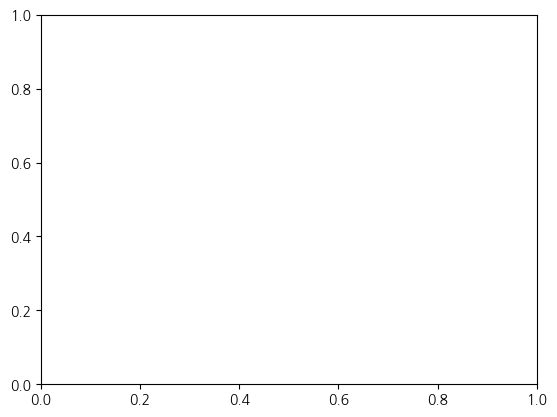

In [27]:
import matplotlib.pyplot as plt
plt.rc('font', family ='NanumGothic')

## 어떤 차트를  사용해야 할까?
a = on.append([df_on[f'{i}_승차'].values[0]])
b = off.append([df_off[f'{i}_승차'].values[0]])

plt.bar(range(24), height=a)
plt.xticks(range(24), b)
plt.show()

시간대별로 사람들이 가장 많이 하차하는 그래프를 그려보자.

## 5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면
---
__만약 모든 지하철역의 시간대별 승하차 인원을 더하면 어떤 결과를 확인할 수 있을까?__

이 질문을 해결하기 위한 알고리즘은 다음과 같이 간단히 생각할 수 있다.

1. 데이터를 읽어온다.
2. 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더한다.
3. 시간대별 승차 인원과 하차 인원을 그래프로 표현한다.

In [ ]:
import pandas as pd

new_df = pd.read_csv('./data/subwaytime_pre.csv', thousands=',')
new_df.head()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.rc('font', family = 'NanumGothic') 
plt.title('지하철 시간대별 승하차 인원 추이') # 제목 추가

plt.show()